In [32]:
import pandas as pd
%matplotlib inline

In [41]:
ny_df = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv', header=4)

ny_df['Robbery'] = ny_df['Robbery'].str.replace(',', '')
ny_df['Population'] = ny_df['Population'].str.replace(',', '')
ny_df['Property\ncrime'] = ny_df['Property\ncrime'].str.replace(',', '')

for col in ny_df.columns:
    try:
        ny_df[col] = pd.to_numeric(ny_df[col])
    except:
        pass

In [42]:
ny_df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [43]:
ny_df['murder_bin'] = [1 if ik>0 else 0 for ik in ny_df['Murder and\nnonnegligent\nmanslaughter']]
ny_df['robbery_bin'] = [1 if ik>0 else 0 for ik in ny_df['Robbery']]
ny_df['pop_sq'] = [ik**2 for ik in ny_df['Population']]

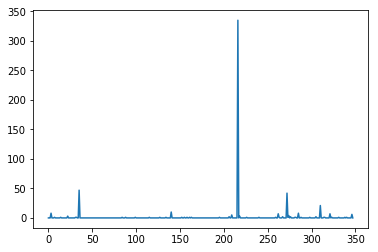

In [44]:
ny_df['Murder and\nnonnegligent\nmanslaughter'].plot()

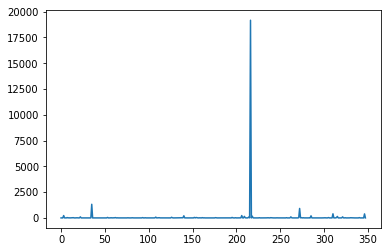

In [45]:
ny_df['Robbery'].plot()

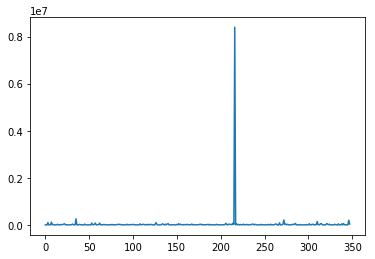

In [46]:
ny_df['Population'].plot()

In [54]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

ny_df_sub = ny_df[['murder_bin', 'robbery_bin', 'pop_sq', 'Property\ncrime']].dropna()

regr.fit(ny_df_sub[['murder_bin', 'robbery_bin', 'pop_sq']], ny_df_sub['Property\ncrime'])
print('coefficients: ', regr.coef_, '\nintercept:', regr.intercept_ )

coefficients:  [  1.18417393e+03   3.00052399e+02   1.99252760e-09] 
intercept: 40.0770439392
